<div class="alert alert-info">

<h4> Задание</h4>
<p></p>
    
Сгенерируйте 150 точек $(x,y)$ по следующему правилу: $y=10сos(1.5 sin(x))$ и добавьте к целевой переменной $y$ случайный шум из нормального распределения с отклонением $\sigma=0.5$. Разбейте выборку на обучение и контроль в соотношении 2:1.
<ol>
<li>Методом наименьших квадратов по обучающей выборке постройте полиномиальную регрессию достаточно высокого порядка (например, 15-20), визуализируйте полученную модель и оцените MSE на отложенной выборке.</li>
<li>Постройте гребневую регрессию. Методом кросс-валидации (GridSearchCV) выберите оптимальный параметр $\lambda$ (alpha в функции Ridge). Получите предсказания полученной моделью для тестовой выборки и оцените качество предсказаний.</li>
    
<li>Постройте лассо-регрессию. Методом кросс-валидации выберите оптимальный параметр $\lambda$.  Получите предсказания полученной моделью для тестовой выборки и оцените качество предсказаний.</li>
<li>Сравните качество результатов визуально и с помощью MSE.</li>

</ol>

<p></p>
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
def true_fun(x):
    return 10 * np.cos(1.5 * np.sin(x))

In [3]:
n_samples = 150

X = np.linspace(-2, 2, n_samples)
y = true_fun(X) + np.random.normal( size = n_samples, scale=0.5,)

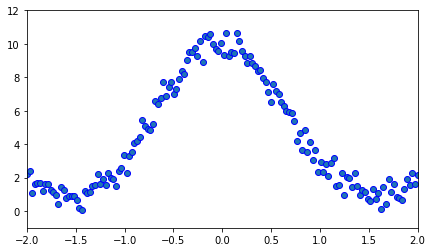

In [4]:
plt.rcParams['figure.figsize'] = (7,4)
plt.scatter(X, y, edgecolor='b', label='Samples')
plt.xlim(-2, 2)
plt.ylim(-1, 12)
plt.show()

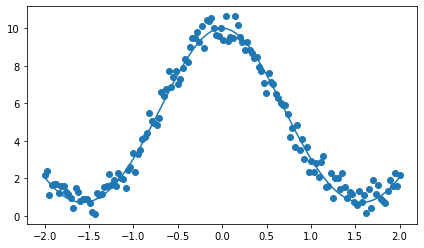

In [5]:
plt.scatter(X, y)
plt.plot(X, [true_fun(x) for x in X])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_test,y_test=zip(* sorted(list(zip(X_test,y_test))))
X_test=np.array(X_test)
y_test=np.array(y_test)

X_train.shape, X_test.shape

((100,), (50,))

In [7]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=17)),
    ('linreg', LinearRegression()),
])


pipeline.fit(X_train.reshape(-1, 1), y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=17)),
                ('linreg', LinearRegression())])

In [8]:
pred = pipeline.predict(X_test.reshape(-1, 1))

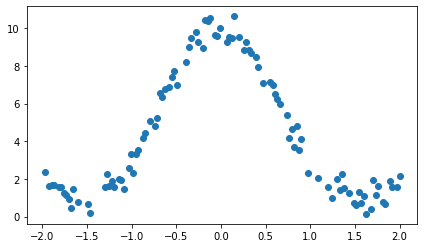

In [9]:
plt.scatter(X_train, y_train)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

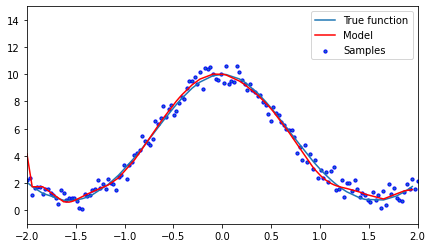

In [11]:
plt.plot(X_test, true_fun(X_test), label='True function')
plt.scatter(X, y, edgecolor='b', s=10, label='Samples')
plt.plot(X_test, pred, label='Model',color = 'red')
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-1, 15)
plt.show()

In [12]:
mean_squared_error(true_fun(X_test),pipeline.predict(X_test.reshape(-1, 1)))

0.13732561428930962

### Постройте гребневую регрессию. Методом кросс-валидации (GridSearchCV) выберите оптимальный параметр  𝜆  (alpha в функции Ridge). Получите предсказания полученной моделью для тестовой выборки и оцените качество предсказаний.

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
degrees = [15, 17, 20]

In [15]:
alpha_list = {'alpha': [0, 0.01, 0.1, 0.5, 1]}

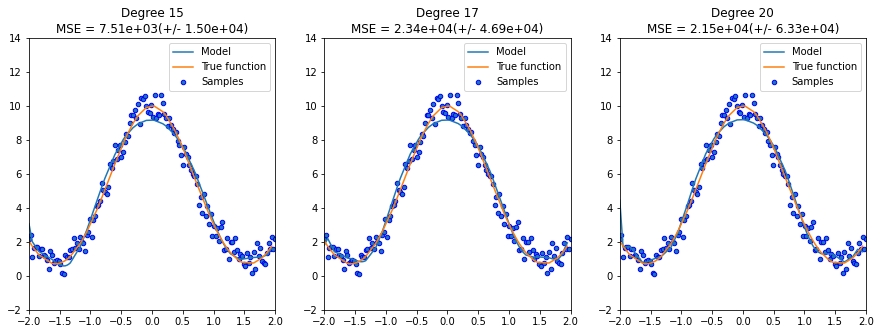

In [34]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Ridge(alpha=1)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X_train.reshape(-1, 1), y_train)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(-2, 2)
    plt.ylim(-2, 14)
    plt.rcParams["figure.figsize"] = (15,5)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [17]:
X_poly = polynomial_features.transform(X.reshape(-1, 1))

In [18]:
model = Ridge()

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [20]:
gs = GridSearchCV(model, alpha_list, scoring='neg_mean_squared_error', cv=kf)

In [21]:
gs.fit(X_poly, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [22]:
gs.best_estimator_

Ridge(alpha=0.01)

In [23]:
gs.best_params_

{'alpha': 0.01}

In [24]:
gs.best_score_

-0.2711898038958164

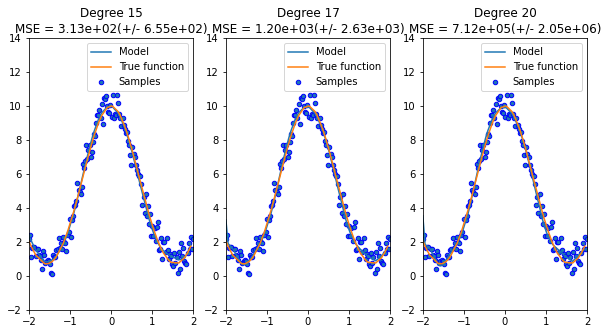

In [25]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Ridge(alpha=0.01)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X_train.reshape(-1, 1), y_train)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(-2, 2)
    plt.ylim(-2, 14)
    plt.rcParams["figure.figsize"] = (10,5)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

### Постройте лассо-регрессию. Методом кросс-валидации выберите оптимальный параметр  𝜆 . Получите предсказания полученной моделью для тестовой выборки и оцените качество предсказаний.

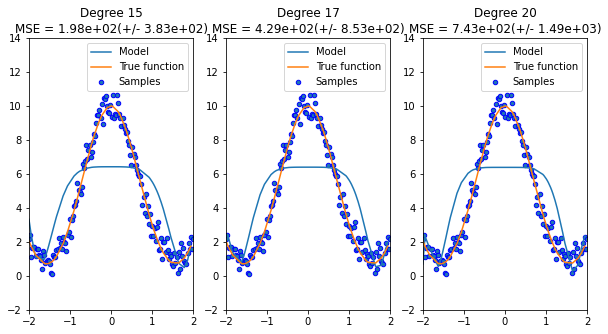

In [26]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Lasso(alpha=1)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X_train.reshape(-1, 1), y_train)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(-2, 2)
    plt.ylim(-2, 14)
    plt.rcParams["figure.figsize"] = (15,5)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

In [27]:
model = Lasso()

In [28]:
gs = GridSearchCV(model, alpha_list, scoring='neg_mean_squared_error', cv=kf)

In [29]:
gs.fit(X_poly, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), param_grid={'alpha': [0, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [30]:
gs.best_estimator_

Lasso(alpha=0)

In [31]:
gs.best_params_

{'alpha': 0}

In [32]:
gs.best_score_

-0.23638843315707297

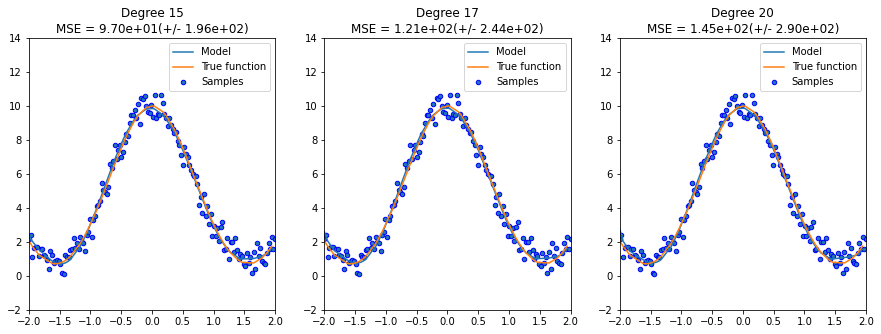

In [33]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    model = Lasso(alpha=0)
    
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', model)])
    
    pipeline.fit(X_train.reshape(-1, 1), y_train)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)

    plt.plot(X_test, pipeline.predict(X_test.reshape(-1, 1)), label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlim(-2, 2)
    plt.ylim(-2, 14)
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    plt.rcParams["figure.figsize"] = (15,5)
    
plt.show()